# A Linear Programming Model for Optimal Transport 

<div class="alert alert-block alert-success">
$\newcommand{\R}{\mathbb{R}} \newcommand{\Z}{\mathbb{Z}} \newcommand{\N}{\mathbb{N}} 
\newcommand{\bff}{\mathbf{f}} \newcommand{\bx}{\mathbf{x}} 
\newcommand{\by}{\mathbf{y}} \newcommand{\bo}{\mathbb{1}} \newcommand{\bJ}{\mathbf{J}}$
In this notebook, we will aim to solve the following optimal transport problem in its linear form:
\begin{align}
\min c^\top x,
\end{align}
subject to
\begin{align}
    \begin{pmatrix} \mathbb{1}_N^\top \otimes I_M \\ I_N \otimes \mathbb{1}_M^\top \end{pmatrix} x &= 
    \begin{pmatrix} m \\ n \end{pmatrix},
    \\
    x &\geq 0;
\end{align}
where $x\in \R^{M\times N}$, $m \in \R^M$, $n \in \R^N$, and $c \in \R^{M\times N}$ is a positive cost vector.
</div>

<div class="alert alert-block alert-info">
The following packages are loaded into the environment. 
</div>

In [1]:
from gurobipy import *
import time
import numpy as np
from numpy         import asarray, indices, double, allclose
from pandas        import read_csv
from skimage.io    import imread, imshow

from skimage.transform      import rescale, resize
from scipy.spatial          import distance_matrix
from scipy.spatial.distance import cdist
from scipy                  import sparse
from scipy.sparse           import csr_matrix as csr

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

<div class="alert alert-block alert-success">
We can actually solve the original problem with an LP solver that allows indexing:
\begin{align}
    \min c : \gamma,
\end{align}
subject to
\begin{align}
    \sum_{j} \gamma_{i,j} &= m_i
    \\
    \sum_{i} \gamma_{i,j} &= n_j
    \\
    \gamma_{i,j} &\geq 0.
\end{align}
</div>

<div class="alert alert-block alert-info">
Here we define the following basic objects:
    
1. `M` and `N` are the number of points where the measures of `μ` and `ν` are concentrated,
2. `c` is the vector of costs.
</div>

In [2]:
# File names
Dir  = '../../DOTmark/Data/ClassicImages/'
Main = 'Scalings/'
nomᵤ = 'data128_1003.csv'
nomᵥ = 'data128_1009.csv'

In [3]:
μ = read_csv(Dir + nomᵤ).values.astype(double);    μ /= μ.max()
ν = read_csv(Dir + nomᵥ).values.astype(double);    ν /= ν.max()

In [4]:
μ = rescale(μ, 2**-1, preserve_range = True, anti_aliasing = False)
ν = rescale(ν, 2**-1, preserve_range = True, anti_aliasing = False)

In [5]:
M = μ.size
N = ν.size

In [6]:
# Coordinates:
Iₘ = (indices(μ.shape)/(asarray(μ.shape)-1)[::,np.newaxis,np.newaxis]).reshape(2,M).T
Iₙ = (indices(ν.shape)/(asarray(ν.shape)-1)[::,np.newaxis,np.newaxis]).reshape(2,N).T
#Sparse alternatives:    indices(μ.shape, sparse=True)      &      indices(ν.shape, sparse=True)

In [7]:
# Cost matrix:
c = cdist(Iₘ, Iₙ, 'sqeuclidean')        # Alternative: distance_matrix(Iₘ, Iₙ) ** 2

In [8]:
P = {'A': (None,'S2'), 'B': (1,'1'), 'C': (1.5,'1.5'), 'D': (2,'2'), 'E': (4,'4'), 'F': (np.inf,'∞')}
test = 'A'

In [9]:
p = '_p=' + P[test][1]

In [10]:
if test != 'A':        c = cdist(Iₘ, Iₙ, 'minkowski', p = P[test][0])

In [11]:
#μ = np.where(μ==0, 1e-4, μ)
#ν = np.where(ν==0, 1e-4, ν)

<div class="alert alert-block alert-warning">
Scale and optimise:
</div>

–––––  Scaling  1  –––––
Freeing default Gurobi environment
Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-17
Time spent in building model:  2.278580904006958
Set parameter IntFeasTol to value 1e-09
Set parameter FeasibilityTol to value 1e-09
Set parameter OptimalityTol to value 1e-09
Set parameter Method to value 0
Set parameter Presolve to value 0
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2048 rows, 1048576 columns and 2097152 nonzeros
Model fingerprint: 0x7d4295a5
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-04, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-04, 2e-03]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3685072e+00   9.981318e-01   1.046531e+12      0s
   81534    2.5525384e-02   0.000000e+00   0.000000e+00      1s

Solved in 81534 it

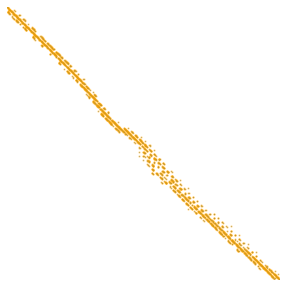

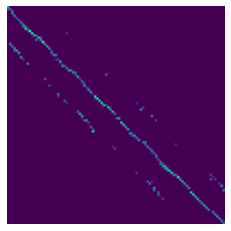




–––––  Scaling  2  –––––
Freeing default Gurobi environment
Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-17
Time spent in building model:  0.18941307067871094
Set parameter IntFeasTol to value 1e-09
Set parameter FeasibilityTol to value 1e-09
Set parameter OptimalityTol to value 1e-09
Set parameter Method to value 0
Set parameter Presolve to value 0
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 512 rows, 65536 columns and 131072 nonzeros
Model fingerprint: 0x93e49d61
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 8e-03]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1593759e+00   9.925744e-01   6.502505e+10      0s
    8141    8.3348298e-02   0.000000e+00   0.000000e+00      0s

Solved in 8141 it

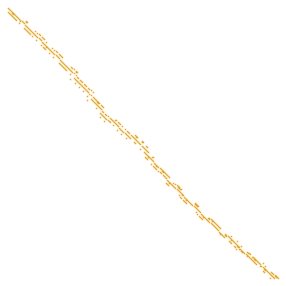

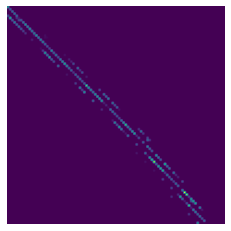




–––––  Scaling  3  –––––
Freeing default Gurobi environment
Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-17
Time spent in building model:  0.02927875518798828
Set parameter IntFeasTol to value 1e-09
Set parameter FeasibilityTol to value 1e-09
Set parameter OptimalityTol to value 1e-09
Set parameter Method to value 0
Set parameter Presolve to value 0
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 128 rows, 4096 columns and 8192 nonzeros
Model fingerprint: 0x9b2fb429
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-03, 3e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.8861245e-01   9.715315e-01   3.969002e+09      0s
     631    1.6478929e-01   0.000000e+00   0.000000e+00      0s

Solved in 631 iterat

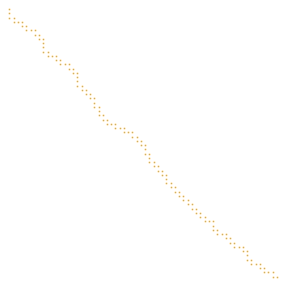

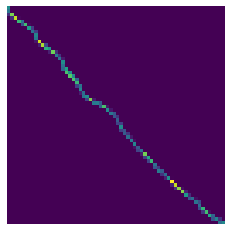




–––––  Scaling  4  –––––
Freeing default Gurobi environment
Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-17
Time spent in building model:  0.008506059646606445
Set parameter IntFeasTol to value 1e-09
Set parameter FeasibilityTol to value 1e-09
Set parameter OptimalityTol to value 1e-09
Set parameter Method to value 0
Set parameter Presolve to value 0
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0x665f5f0e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-02, 1e-01]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.2975929e-01   8.901232e-01   2.250001e+08      0s
      87    1.6716167e-01   0.000000e+00   0.000000e+00      0s

Solved in 87 iteration

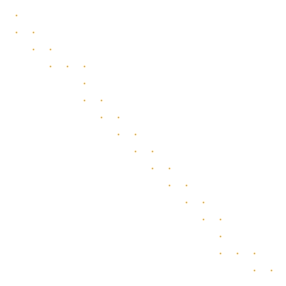

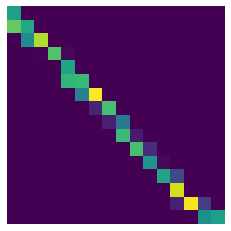

In [13]:
for i in range(5):
    
    print('–'*5, ' Scaling ', i, ' ' + '–'*5)
    
    if i != 0:
        μ = rescale(μ, 0.5, preserve_range = True, anti_aliasing = False)
        ν = rescale(ν, 0.5, preserve_range = True, anti_aliasing = False)
        c = resize(c, (μ.size, ν.size), preserve_range = True, anti_aliasing=True)
        
        M = μ.size
        N = ν.size
    m = μ.ravel() / μ.sum()
    n = ν.ravel() / ν.sum()
    
    # Optimise
    disposeDefaultEnv()
    if 'mo' in globals(): del mo
    if 'γ'  in globals(): del γ
    
    
    # Model
    start = time.time()
    mo = Model()
    γ  = {}
    γ = mo.addMVar( (M,N), vtype = 'C', name ='g', obj = c, lb = 0.0)

    mo.addConstrs( (γ[i,:].sum() == m[i] for i in range(M)), name='m' );
    mo.addConstrs( (γ[:,j].sum() == n[j] for j in range(N)), name='n');
    end = time.time()
    print('Time spent in building model: ', end-start)
    γ.setAttr('obj', c)
    mo.Params.IntFeasTol, mo.Params.FeasibilityTol, mo.Params.OptimalityTol = 1e-9, 1e-9, 1e-9
    
    mo.setParam('Method', 0);    mo.Params.Presolve = 0;    mo.optimize()
    
    # Compress solution
    sparse_solution = csr(γ.x)
    General_Name = Main + 'I_' + str(M) + '-' + str(N) + '_' + p
    
    # Plot
    plt.figure(figsize = (5,5))
    plt.spy(sparse_solution, markersize=1, aspect = 1, markeredgecolor = 'orange', alpha=0.5);    plt.axis('off')
    plt.savefig(General_Name + '_Plot.pdf', bbox_inches='tight',transparent=True)
    plt.show()
    
    plt.imshow(sparse_solution[:100,:100].A);  plt.axis('off');  
    plt.show()
    
    # Store data
    np.save(General_Name + '_m'   ,   m)    # Source measure m
    np.save(General_Name + '_n'   ,   n)    # Target measure m
    sparse.save_npz(General_Name + '_Sol', sparse_solution)  # solution in csr
    np.savez_compressed(General_Name + '_Cost', c=c)         # compressed cost
    
    print('\n\n')

<div class="alert alert-block alert-warning">
Notes
</div>

We no longer use the following for storing the solution and cost matrices:
```Python
    np.save(General_Name + '_Cost',   c)    # Cost matrix c
    np.save(General_Name + '_Sol' , γ.x)    # Solution
```
We store two separate structures which can be easily read back with
```Python
    sparse.load_npz(General_Name + '_Sol.npz').A  # for solution map
    np.load(General_Name + '_Cost.npz')['c']    # for cost matrix
```

---